In [0]:
import tensorflow as tf


In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])


In [0]:
def plot_compare_accuracy(stats1, stats2, legend_arr=[]):
  import matplotlib.pylab as plt
  plt.figure()
  plt.ylabel("Accuracy")
  plt.xlabel("Training Steps")
  plt.ylim([0,1])
  plt.plot(stats1.batch_acc)
  plt.plot(stats2.batch_acc)
  plt.legend(legend_arr, loc='lower right')
  plt.show()
  

In [0]:
batch_stats_conv_temp = CollectBatchStats()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks = [batch_stats_conv_temp])
test_loss = model.evaluate(test_images, test_labels)
print("Test Loss {}".format(test_loss))

Epoch 1/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5224 - acc: 0.8183
Epoch 2/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3921 - acc: 0.8584
Epoch 3/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.3553 - acc: 0.8714
Epoch 4/5
60000/60000 [==============================] - 9s 154us/sample - loss: 0.3344 - acc: 0.8774
Epoch 5/5
10000/10000 [==============================] - 1s 84us/sample - loss: 0.3701 - acc: 0.8644
Test Loss [0.3701105746030807, 0.8644]


In [0]:
batch_stats_conv_temp = CollectBatchStats()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks = [batch_stats_conv_temp])
test_loss = model.evaluate(test_images, test_labels)
print("Test Loss {}".format(test_loss))

Epoch 1/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.4975 - acc: 0.8240
Epoch 2/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3779 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3363 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3128 - acc: 0.8864
Epoch 5/5
10000/10000 [==============================] - 1s 82us/sample - loss: 0.3378 - acc: 0.8783
Test Loss [0.33778635346889496, 0.8783]


In [0]:
batch_stats_conv = CollectBatchStats()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, callbacks = [batch_stats_conv])
test_loss = model.evaluate(test_images, test_labels)
print("Test Loss {}".format(test_loss))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

In [0]:
def analyse_layers(deepmodel, vtest_images, conv_layer_number=1):
  import matplotlib.pyplot as plt
  from tensorflow.keras import models
  f, axarr = plt.subplots(3,4)
  layer_outputs = [layer.output for layer in deepmodel.layers]
  activation_model = tf.keras.models.Model(inputs = deepmodel.input, outputs = layer_outputs)
  for x in range(0,4):
    f1 = activation_model.predict(vtest_images.reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, conv_layer_number], cmap='inferno')
    axarr[0,x].grid(False)
    
    

In [0]:
# Experimenting by using Unnormalized
batch_stats_reduced_cov = CollectBatchStats()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 1.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 1.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, callbacks = [batch_stats_reduced_cov])
test_loss = model.evaluate(test_images, test_labels)
print("Test Loss {}".format(test_loss))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
Total para

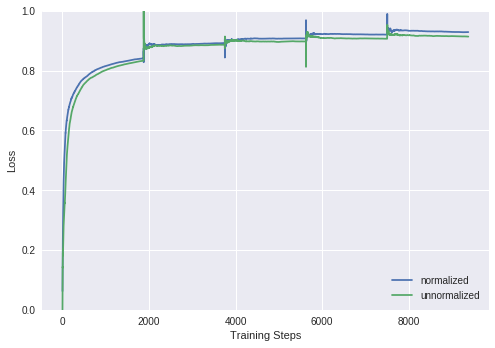

In [0]:
plot_compare_accuracy(batch_stats_conv, batch_stats_reduced_cov, ["normalized", "unnormalized"])

In [0]:
# Experimenting by using reduced layer

batch_stats_reduced_conv = CollectBatchStats()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
 tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(10, activation= 'softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, callbacks=[batch_stats_reduced_conv])
test_loss = model.evaluate(test_images, test_labels)
print("Test Loss {}".format(test_loss))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 13s 220us/sample - loss: 0.3743 - acc: 0.8667
Epoch 2/5
60000/60000 [======

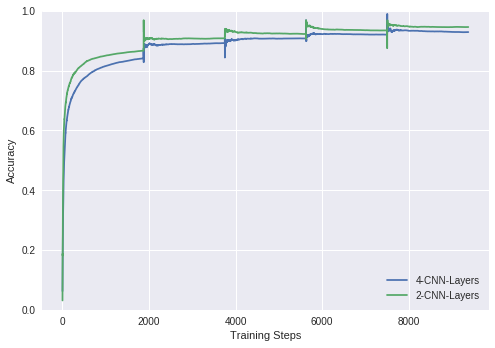

In [0]:
plot_compare_accuracy(batch_stats_conv, batch_stats_reduced_conv, ["4-CNN-Layers", "2-CNN-Layers"])

In [0]:
# Experimenting by further reduction to 32

batch_stats_further_reduced_conv = CollectBatchStats()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, callbacks = [batch_stats_further_reduced_conv])
test_loss = model.evaluate(test_images, test_labels)
print("Test Loss {}".format(test_loss))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.3872 - acc: 0.8606
Epoch 2/5
60000/60000 [==========

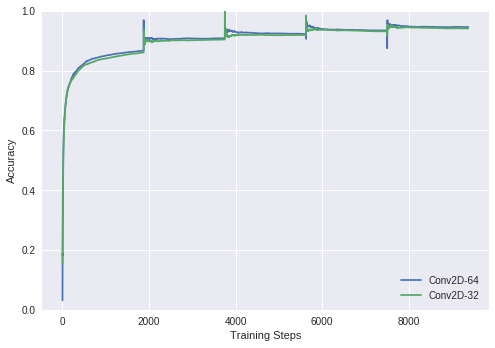

In [0]:
plot_compare_accuracy(batch_stats_reduced_conv, batch_stats_further_reduced_conv, ["Conv2D-64", "Conv2D-32"])

In [0]:
# Experimenting by increasing epochs = 10 

batch_stats_epoch10_conv = CollectBatchStats()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10, callbacks=[batch_stats_epoch10_conv])
test_loss = model.evaluate(test_images, test_labels)
print("Test Loss {}".format(test_loss))

4423680/4422102 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_______

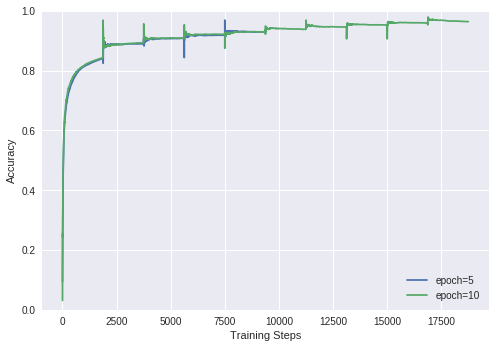

In [0]:
plot_compare_accuracy(batch_stats_conv, batch_stats_epoch10_conv, ["epoch=5", "epoch=10"])

In [0]:
# Experimenting by increasing epochs = 15 

batch_stats_epoch15_conv = CollectBatchStats()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=15, callbacks=[batch_stats_epoch10_conv])
test_loss = model.evaluate(test_images, test_labels)
print("Test Loss {}".format(test_loss))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total para

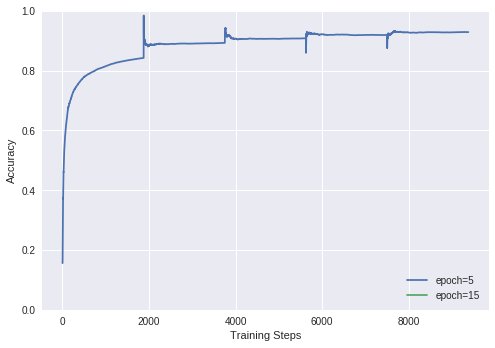

In [0]:
plot_compare_accuracy(batch_stats_conv, batch_stats_epoch15_conv, ["epoch=5", "epoch=15"])

In [0]:
# Experimenting by adding more layers but reducing number of parameters
batch_stats_add_cov = CollectBatchStats()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, callbacks = [batch_stats_add_cov])
test_loss = model.evaluate(test_images, test_labels)
print("Test Loss {}".format(test_loss))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 32)                0         
__________

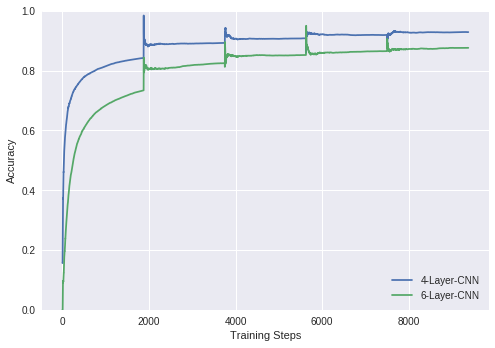

In [0]:
plot_compare_accuracy(batch_stats_conv, batch_stats_add_cov, ["4-Layer-CNN", "6-Layer-CNN"])

In [0]:
# Experimenting by adding more layers but increasing number of parameters

batch_stats_add_more_conv = CollectBatchStats()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5, callbacks = [batch_stats_add_more_conv])
test_loss = model.evaluate(test_images, test_labels)
print("Test Loss {}".format(test_loss))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 128)               0         
__________

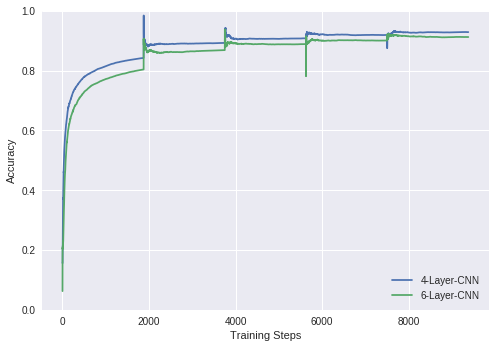

In [0]:
plot_compare_accuracy(batch_stats_conv, batch_stats_add_more_conv, ["4-Layer-CNN", "6-Layer-CNN"])